Please **submit this Jupyter notebook through Canvas** no later than **Monday November 16, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

WENBO SUN 13087347 \
SHUAI WANG 13128051

-----
# Exercise 1

**If use plt.contour we can get result easier but cannot add label in images. There are two many curves in 2.d so we use get_ellipse() and solve_ellipse() functions to get ellipse X,Y position to use plt.plot() to draw, getting labels.**

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph. It is **not** allowed to use numpy.polyfit, but you may have a look at the documentation to see some examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

# For questions If use plt.contour we can get result easier but cannot add label in images. There are two many curves in 2.d so we use 
# get_ellipse and solve_ellipse functions to get X,Y points to use plt.plot() to draw, getting labels.

#Calculate ellipse position by central position, long and short axis
def get_ellipse(e_x, e_y, a, b, e_angle):
    angles_circle  = np.arange(0, 2 * np.pi, 0.01)
    x = []
    y = []
    for angles in angles_circle:
        or_x = a * math.cos(angles)
        or_y = b * math.sin(angles)
        length_or = np.sqrt(or_x * or_x + or_y * or_y)
        or_theta = math.atan2(or_y, or_x)
        new_theta = or_theta + e_angle/180 *math.pi
        new_x = e_x + length_or * math.cos(new_theta)
        new_y = e_y + length_or * math.sin(new_theta)
        x.append(new_x)
        y.append(new_y)
    return x,y #Get back  X,Y ellipse points


import warnings
warnings.filterwarnings("ignore")

# Ax^2 + Bxy + Cy^2 + Dx +Ey + F =0
# Give parameter and return 
# X_center, Y_center, MA_long axis, SMA_ small axis, Theta_angle 
def solve_ellipse(A,B,C,D,E,F):
    Xc = (B*E-2*C*D)/(4*A*C-B**2)
    Yc = (B*D-2*A*E)/(4*A*C-B**2)
       
    FA1 = 2*(A*Xc**2+C*Yc**2+B*Xc*Yc-F)
    FA2 = np.sqrt((A-C)**2+B**2)

    MA = np.sqrt(FA1/(A+C+FA2))
    
   
    SMA= np.sqrt(FA1/(A+C-FA2)) if A+C-FA2!=0 else 0 #minor axis

        
    if B==0 and F*A<F*C:
        Theta = 0
    elif B==0 and F*A>=F*C:
        Theta = 90
    elif B!=0 and F*A<F*C:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 0.5*(-90-alpha) if alpha<0 else 0.5*(90-alpha)
    else:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 90+0.5*(-90-alpha) if alpha<0 else 90+0.5*(90-alpha)
           
    if MA<SMA:
        MA,SMA = SMA,MA
           
    #return back X_center, Y_center, MA_long axis, SMA_ small axis, Theta_angle        
    return [Xc,Yc,MA,SMA,Theta] 



The line function is   69.620534 + -0.641357x  = 0


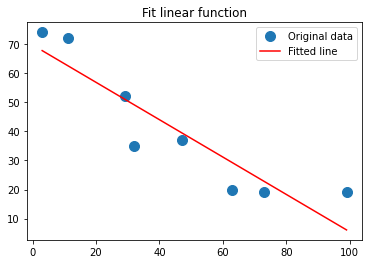

The quadratic function is   81.940687 + -1.447544x + 0.008121x^2 = 0


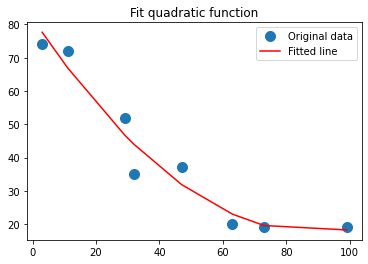

The cubic function is   80.185251 +  -1.202686x + 0.001852x^2 + 0.000041x^3 = 0


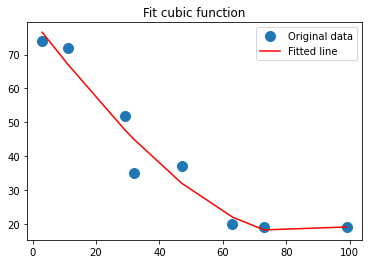

In [2]:
# YOUR CODE HERE
'''
#fit a straight line 
A = np.vstack([t, np.ones(len(t))]).T
m, c = np.linalg.lstsq(A, w, rcond=None)[0]
print(m,c)

plt.plot(t, w, 'o', label='Original data', markersize=10)
plt.plot(t, m * t + c, 'r', label='Fitted line')
plt.legend()
plt.show()
'''


#fit a line function
ones = np.ones(8)
features1 = np.concatenate((np.vstack(ones),np.vstack(t)), axis = 1)
p = np.linalg.lstsq(features1, w, rcond=None)[0]

plt.plot(t, w, 'o', label='Original data', markersize=10)
plt.plot(t, p[0] + t * p[1] , 'r', label='Fitted line')
print('The line function is   %f + %fx  = 0' % (p[0],p[1]))
plt.title("Fit linear function")
plt.legend()
plt.show()


#fit a quadratic function
ones = np.ones(8)
squaredt  = t ** 2
features2 = np.concatenate((np.vstack(ones),np.vstack(t),np.vstack(squaredt)), axis = 1)
p = np.linalg.lstsq(features2, w,rcond=None)[0]

plt.plot(t, w, 'o', label='Original data', markersize=10)
plt.plot(t, p[0] + p[1] * t + p[2] * t**2, 'r', label='Fitted line')
print('The quadratic function is   %f + %fx + %fx^2 = 0' % (p[0],p[1],p[2]))
plt.title("Fit quadratic function")
plt.legend()
plt.show()

#fit a cubic function
cubict  = t ** 3
features3 = np.concatenate((np.vstack(ones),np.vstack(t),np.vstack(squaredt),np.vstack(cubict)), axis = 1)
p = np.linalg.lstsq(features3, w, rcond=None)[0]

plt.plot(t, w, 'o', label='Original data', markersize=10)
plt.plot(t, p[0] + p[1] *t +p[2] *t **2 + p[3] *t **3, 'r', label='Fitted line')
print('The cubic function is   %f +  %fx + %fx^2 + %fx^3 = 0' % (p[0],p[1],p[2],p[3]))
plt.title("Fit cubic function")
plt.legend()
plt.show()

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [3]:
# YOUR CODE HERE
cond_linear = np.linalg.cond(features1)
cond_quadratic = np.linalg.cond(features2)
cond_cubic = np.linalg.cond(features3)
print("cond_linear :",cond_linear)
print("cond_quadratic :",cond_quadratic)
print("cond_cubic :",cond_cubic)


cond_linear : 95.97978844376203
cond_quadratic : 10562.21478918897
cond_cubic : 1192946.8771575496


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

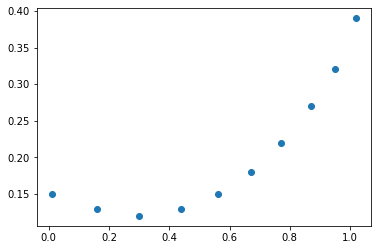

In [4]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

import matplotlib.pyplot as plt
t = np.linspace(0, 2*np.pi, 101)

plt.scatter(x,y)
plt.show()

The ellipse function is   -2.635625y^2 +  0.143646xy + 0.551447x +  3.222940y +  -0.432894 = x^2 


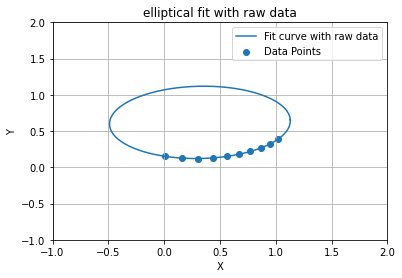

singular values of A:[3.78603638 0.94492272 0.20891299 0.02304315 0.00549953]
cond of A:688.4294468693203


In [5]:
ones10 = np.ones(10)

# Formulate and solve the least squares problem ||Ax - b ||^2
A = np.concatenate(( np.vstack(y**2),np.vstack(x * y), np.vstack(x), np.vstack(y), np.vstack(ones10) ), axis = 1)
b =  np.vstack(x)**2

X = np.linalg.lstsq(A, b,rcond=None)[0]

# Print the equation of the ellipse in standard form
print('The ellipse function is   %fy^2 +  %fxy + %fx +  %fy +  %f = x^2 ' % (X[0],X[1],X[2],X[3],X[4]))  

# Plot the noisy data
plt.scatter(x, y, label='Data Points')

# Ax^2 + Bxy + Cy^2 + Dx +Ey + F =0
Xc,Yc,MA,SMA,Theta =  solve_ellipse(-1, X[1], X[0], X[2], X[3], X[4])
xx, yy = get_ellipse(Xc, Yc, MA, SMA, Theta)
    
plt.plot(xx, yy, label= "Fit curve with raw data")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid()
plt.title("elliptical fit with raw data")
plt.show()

print("singular values of A:" + str(np.linalg.svd(A)[1]))
print("cond of A:" + str(np.linalg.cond(A)))


## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

The former ellipse equation is:  -2.635625y^2 +  0.143646xy + 0.551447x+  3.222940y +  -0.432894 = x^2 
The new ellipse equation is:     -1.883990y^2 +  -0.189069xy + 0.623152x+  3.102579y +  -0.438747 = x^2 


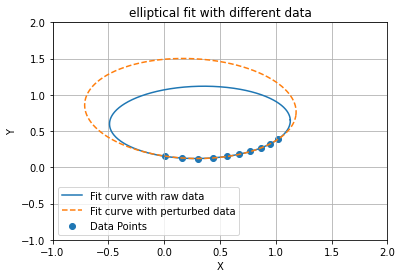

In [6]:
# YOUR CODE HERE
random = 0.01 * (np.random.rand(2,10) - 0.5)
x_per =  x + random[0,:]
y_per =  y + random[1,:]

# Formulate and solve the least squares problem ||Ax - b ||^2
A_per = np.vstack((y_per**2,x_per*y_per,x_per,y_per,ones10)).T
b =  np.vstack(x)**2

X_new = np.linalg.lstsq(A_per, b,rcond=None)[0]

# Print the equation of the ellipse in standard form

print('The former ellipse equation is:  %fy^2 +  %fxy + %fx+  %fy +  %f = x^2 ' % (X[0],X[1],X[2],X[3],X[4]))
print('The new ellipse equation is:     %fy^2 +  %fxy + %fx+  %fy +  %f = x^2 ' % (X_new[0],X_new[1],X_new[2],X_new[3],X_new[4]))  

# Plot the noisy data
plt.scatter(x, y, label='Data Points')


# Plot the least squares ellipse
x_coord = np.linspace(-1,2,300)
y_coord = np.linspace(-1,2,300)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord_new =   X_new[0] * Y_coord**2 + X_new[1] * X_coord * Y_coord  + X_new[2] * X_coord + X_new[3] * Y_coord + X_new[4]  - X_coord ** 2 
#plt.contour(X_coord, Y_coord, Z_coord, levels=[0], colors=('r'), linewidths=2)
#contour_new = plt.contour(X_coord, Y_coord, Z_coord_new, levels=[0], colors=('y'), linewidths=2)

# Ax^2 + Bxy + Cy^2 + Dx +Ey + F =0
Xc,Yc,MA,SMA,Theta =  solve_ellipse(-1, X_new[1], X_new[0], X_new[2], X_new[3], X_new[4])
xx_per, yy_per = get_ellipse(Xc, Yc, MA, SMA, Theta)


plt.plot(xx, yy, label= "Fit curve with raw data")
plt.plot(xx_per, yy_per, linestyle="--", label= "Fit curve with perturbed data")
plt.title("elliptical fit with different data")
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


 Ellipse orbit changed with adding litte perturbed noise to data

## (c)
Can you explain this behaviour?

According to the singular values given by exercise 2.a, matrix A is near-singular. From the plot we can also see although there are 10 data points, it is nearly a straight line. The matrix condition number is 688, indicating that the matrix is sensitive to the small perturbation. The underlying reason is the matrix A suffers from rank deficiency, which means the matrix A has multi-solution giving small norm. A trivial perturbation of matrix A could lead to another solution with a smaller norm.

Hence, in the exercise 2.b, small perturbation is applied to the matrix A. The LSTSQ gives a different solution.

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

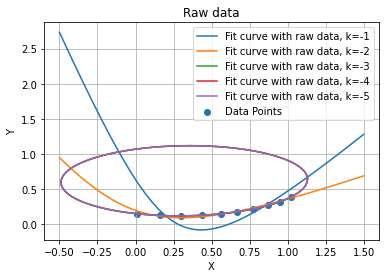

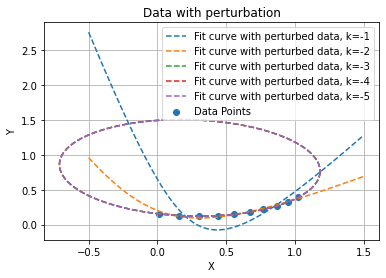

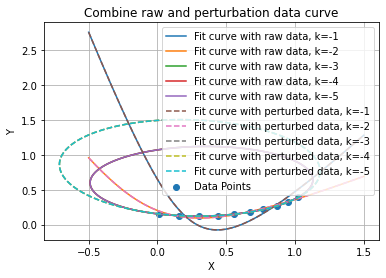

In [7]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)


t = np.linspace(0, 2*np.pi, 101)

ones = np.ones(10)

# Formulate and solve the least squares problem ||Ax - b ||^2
A = np.vstack((y**2,x*y,x,y,ones)).T
b =  x**2

X_1 = np.linalg.lstsq(A, b,rcond=10**(-1))[0]
X_2 = np.linalg.lstsq(A, b,rcond=10**(-2))[0]
X_3 = np.linalg.lstsq(A, b,rcond=10**(-3))[0]
X_4 = np.linalg.lstsq(A, b,rcond=10**(-4))[0]
X_5 = np.linalg.lstsq(A, b,rcond=10**(-5))[0]


X_per_1 = np.linalg.lstsq(A_per, b,rcond=10**(-1))[0]
X_per_2 = np.linalg.lstsq(A_per, b,rcond=10**(-2))[0]
X_per_3 = np.linalg.lstsq(A_per, b,rcond=10**(-3))[0]
X_per_4 = np.linalg.lstsq(A_per, b,rcond=10**(-4))[0]
X_per_5 = np.linalg.lstsq(A_per, b,rcond=10**(-5))[0]




                         ##########Get raw data curve result############
y0_list_1,y1_list_1=[],[]
y0_list_2,y1_list_2=[],[] 
y0_list_3,y1_list_3=[],[]

x_cord = np.linspace(-0.5,1.5,300)
for i in x_cord:
    arg_1 = [X_1[0], X_1[1] * i + X_1[3], X_1[2]* i + X_1[4]- i**2 ]
    arg_2 = [X_2[0], X_2[1] * i + X_2[3], X_2[2]* i + X_2[4]- i**2 ]
    arg_3 = [X_3[0], X_3[1] * i + X_3[3], X_3[2]* i + X_3[4]- i**2 ]
    
    y_10, y_11 = np.roots(arg_1)
    y_20, y_21 = np.roots(arg_2)
    y_30, y_31 = np.roots(arg_3)
    
    y0_list_1.append(y_10)
    y1_list_1.append(y_11)
    y0_list_2.append(y_20)
    y1_list_2.append(y_21)
    y0_list_3.append(y_30)
    y1_list_3.append(y_31)
    
plt.plot(x_cord ,y1_list_1,label= "Fit curve with raw data, k=-1")
plt.plot(x_cord ,y1_list_2,label= "Fit curve with raw data, k=-2")


# Ax^2 + Bxy + Cy^2 + Dx +Ey + F =0
Xc_1,Yc_1,MA_1,SMA_1,Theta_1 =  solve_ellipse(-1, X_1[1], X_1[0], X_1[2], X_1[3], X_1[4])
xx_1, yy_1 = get_ellipse(Xc_1,Yc_1,MA_1,SMA_1,Theta_1)
Xc_2,Yc_2,MA_2,SMA_2,Theta_2 =  solve_ellipse(-1, X_2[1], X_2[0], X_2[2], X_2[3], X_2[4])
xx_2, yy_2 = get_ellipse(Xc_2,Yc_2,MA_2,SMA_2,Theta_2)
Xc_3,Yc_3,MA_3,SMA_3,Theta_3 =  solve_ellipse(-1, X_3[1], X_3[0], X_3[2], X_3[3], X_3[4])
xx_3, yy_3 = get_ellipse(Xc_3,Yc_3,MA_3,SMA_3,Theta_3)
Xc_4,Yc_4,MA_4,SMA_4,Theta_4 =  solve_ellipse(-1, X_4[1], X_4[0], X_4[2], X_4[3], X_4[4])
xx_4, yy_4 = get_ellipse(Xc_4,Yc_4,MA_4,SMA_4,Theta_4)
Xc_5,Yc_5,MA_5,SMA_5,Theta_5 =  solve_ellipse(-1, X_5[1], X_5[0], X_5[2], X_5[3], X_5[4])
xx_5, yy_5 = get_ellipse(Xc_5,Yc_5,MA_5,SMA_5,Theta_5)


plt.plot(xx_3, yy_3, label= "Fit curve with raw data, k=-3")
plt.plot(xx_4, yy_4, label= "Fit curve with raw data, k=-4")
plt.plot(xx_5, yy_5, label= "Fit curve with raw data, k=-5")

# Plot the  data
plt.scatter(x, y, label='Data Points')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw data')
plt.grid()
plt.show()



                                  ################Get perturbed data curve result################
[a,b,c,d,e] = X_per_1
y0_list_1,y1_list_1=[],[]
y0_list_2,y1_list_2=[],[] 
y0_list_3,y1_list_3=[],[]

x_cord = np.linspace(-0.5,1.5,300)
for i in x_cord:
    arg_per_1 = [X_per_1[0], X_per_1[1] * i + X_per_1[3], X_per_1[2]* i + X_per_1[4]- i**2 ]
    arg_per_2 = [X_per_2[0], X_per_2[1] * i + X_per_2[3], X_per_2[2]* i + X_per_2[4]- i**2 ]
    arg_per_3 = [X_per_3[0], X_per_3[1] * i + X_per_3[3], X_per_3[2]* i + X_per_3[4]- i**2 ]
    
    y_per_10, y_per_11 = np.roots(arg_per_1)
    y_per_20, y_per_21 = np.roots(arg_per_2)
    y_per_30, y_per_31 = np.roots(arg_per_3)
    
    y0_list_1.append(y_per_10)
    y1_list_1.append(y_per_11)
    y0_list_2.append(y_per_20)
    y1_list_2.append(y_per_21)
    y0_list_3.append(y_per_30)
    y1_list_3.append(y_per_31)

#Plot two result who is not ellipse, hence cannot use  ellipse to get X and Y points.
plt.plot(x_cord ,y1_list_1,label= "Fit curve with perturbed data, k=-1", linestyle="--")
plt.plot(x_cord ,y1_list_2,label= "Fit curve with perturbed data, k=-2", linestyle="--")

#Get results of three ellipse
Xc_per_3, Yc_per_3, MA_per_3,SMA_per_3,Theta_per_3 =  solve_ellipse(-1, X_per_3[1], X_per_3[0], X_per_3[2], X_per_3[3], X_per_3[4])
xx_per_3, yy_per_3 = get_ellipse(Xc_per_3,Yc_per_3,MA_per_3,SMA_per_3,Theta_per_3)

Xc_per_4, Yc_per_4, MA_per_4,SMA_per_4,Theta_per_4 =  solve_ellipse(-1, X_per_4[1], X_per_4[0], X_per_4[2], X_per_4[3], X_per_4[4])
xx_per_4, yy_per_4 = get_ellipse(Xc_per_4,Yc_per_4,MA_per_4,SMA_per_4,Theta_per_4)

Xc_per_5, Yc_per_5, MA_per_5,SMA_per_5,Theta_per_5 =  solve_ellipse(-1, X_per_5[1], X_per_5[0], X_per_5[2], X_per_5[3], X_per_5[4])
xx_per_5, yy_per_5 = get_ellipse(Xc_per_5,Yc_per_5,MA_per_5,SMA_per_5,Theta_per_5)


plt.plot(xx_per_3, yy_per_3, label= "Fit curve with perturbed data, k=-3", linestyle="--")
plt.plot(xx_per_4, yy_per_4, label= "Fit curve with perturbed data, k=-4", linestyle="--")
plt.plot(xx_per_5, yy_per_5, label= "Fit curve with perturbed data, k=-5", linestyle="--")


plt.scatter(x, y, label='Data Points')
plt.title('Data with perturbation')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()


#plot two image together
plt.plot(x_cord ,y1_list_1,label= "Fit curve with raw data, k=-1")
plt.plot(x_cord ,y1_list_2,label= "Fit curve with raw data, k=-2")
plt.plot(xx_3, yy_3, label= "Fit curve with raw data, k=-3")
plt.plot(xx_4, yy_4, label= "Fit curve with raw data, k=-4")
plt.plot(xx_5, yy_5, label= "Fit curve with raw data, k=-5")

plt.plot(x_cord ,y1_list_1,label= "Fit curve with perturbed data, k=-1", linestyle="--")
plt.plot(x_cord ,y1_list_2,label= "Fit curve with perturbed data, k=-2", linestyle="--")
plt.plot(xx_per_3, yy_per_3, label= "Fit curve with perturbed data, k=-3", linestyle="--")
plt.plot(xx_per_4, yy_per_4, label= "Fit curve with perturbed data, k=-4", linestyle="--")
plt.plot(xx_per_5, yy_per_5, label= "Fit curve with perturbed data, k=-5", linestyle="--")

plt.title('Combine raw and perturbation data curve')
plt.scatter(x, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()



### Explanation
According to the answer of exercise 2.c, the matrix A is a near-singular matrix which has evident rank deficiency. The parameter rcond gives a relative tolerance singular value. If the singular values of the remaining columns are smaller than rcond\*largest_sigular_value, the solving process is terminated. The largest singular value of this example is 3.78603638.

The effect of rcond parameter is given by exercise 2.d. When the rcond=$10^{-1}$ and $10^{-2}$, the rank of the matrix A is reduced to 2 and 3. The solutions are illustrated by the blue and orange line.The perturbation now has less effect on the fitting result.
Another effect is that ignoring the columns with small sigular value brings the solution stability. After adding the perturbation to A, the solutions are almost identical to the solution of origin matrix A. 

As the rcond getting smaller, all singular values are larger than the rcond, which means this parameter has no effect on the solutions. The solutions with perturbated input are unstable again.
